In [1]:
import pandas as pd

In [3]:
#Load Data
df = pd.read_csv(r"C:\Users\prudh\Downloads\survey.csv")

In [9]:
# Display Basic Info
print(df.shape)
print(df.columns)
df.head()

(1259, 27)
Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [11]:
# checking null values
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [13]:
# Fill 'state'
df['state'] = df['state'].fillna('Not specified')

# Fill 'self_employed'
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])

# Fill 'work_interfere'
df['work_interfere'] = df['work_interfere'].fillna('Not specified')

# Drop 'comments' column
df.drop(columns=['comments'], inplace=True)


In [15]:
df.isnull().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [21]:
# chexking duplicate values
df.duplicated().sum()

0

In [23]:
df['Gender'] = df['Gender'].str.strip().str.lower()
gender_map = {
    'male': 'Male', 'm': 'Male',
    'female': 'Female', 'f': 'Female',
    'trans-female': 'Transgender', 'trans male': 'Transgender',
    'transgender': 'Transgender', 'agender': 'Other'
}
df['Gender'] = df['Gender'].map(gender_map).fillna('Other')


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

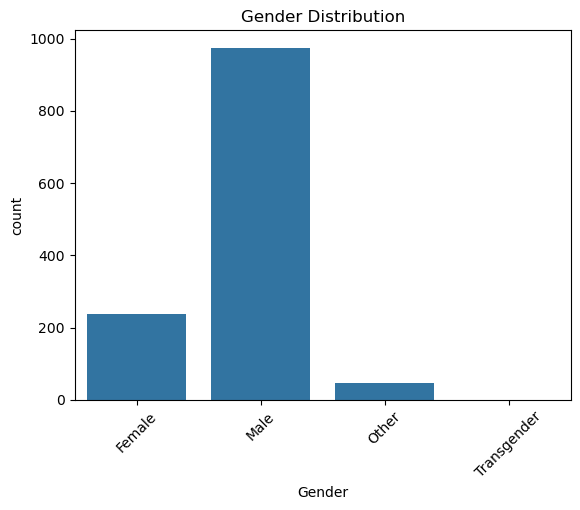

In [27]:
# Bar Chart For Univariate analysis
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xticks(rotation=45)
plt.show()

In [31]:
print("Min age:", df['Age'].min())
print("Max age:", df['Age'].max())
print(df['Age'].describe())


Min age: -1726
Max age: 99999999999
count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64


In [33]:
df = df[(df['Age'] >= 15) & (df['Age'] <= 100)]


In [35]:
df.reset_index(drop=True, inplace=True)


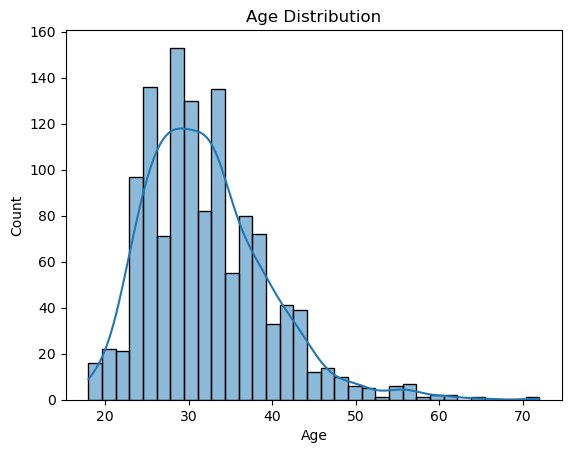

In [37]:
# Histogram for Univariate analysis
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


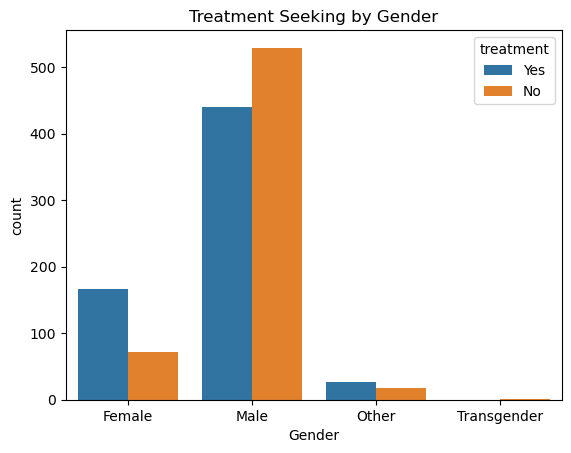

In [39]:
# Relation Between Gender and Treatment
sns.countplot(x='Gender', hue='treatment', data=df)
plt.title('Treatment Seeking by Gender')
plt.show()


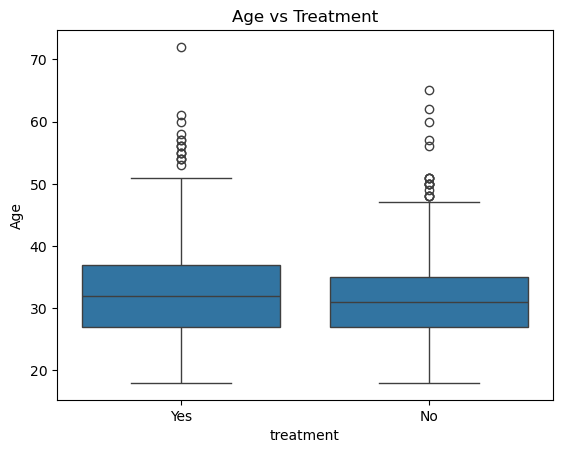

In [41]:
# Relation Between Age and Treatment
sns.boxplot(x='treatment', y='Age', data=df)
plt.title('Age vs Treatment')
plt.show()


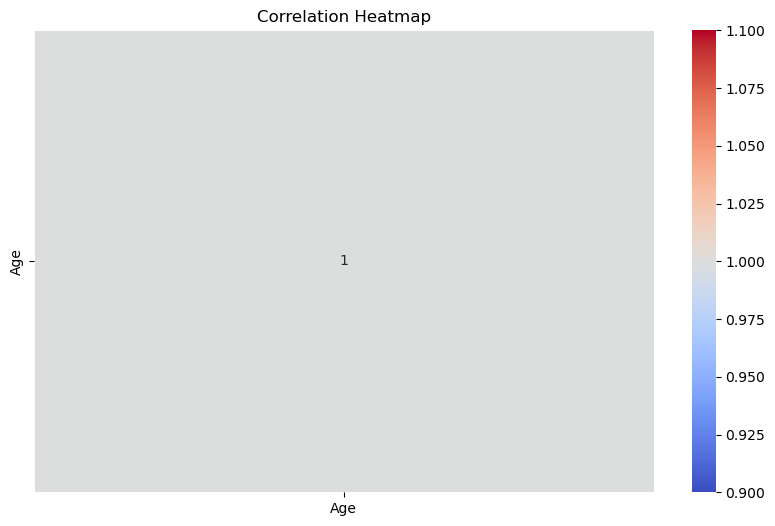

In [43]:
# Correlation Heat Map
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [47]:
df['treatment_encoded'] = df['treatment'].map({'Yes': 1, 'No': 0})
df['family_history_encoded'] = df['family_history'].map({'Yes': 1, 'No': 0})
df['self_employed_encoded'] = df['self_employed'].map({'Yes': 1, 'No': 0})


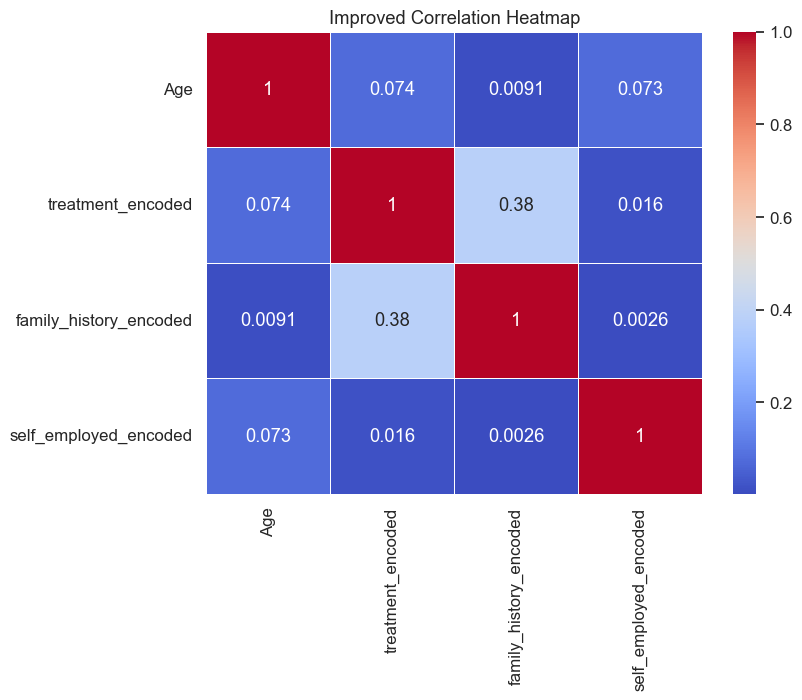

In [49]:
corr_matrix = df[['Age', 'treatment_encoded', 'family_history_encoded', 'self_employed_encoded']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Improved Correlation Heatmap")
plt.show()


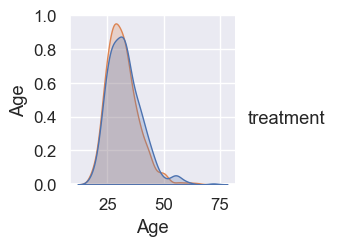

In [51]:
num_cols = ['Age']  
sns.pairplot(df[num_cols + ['treatment']], hue='treatment', diag_kind='kde')
plt.show()


In [53]:
df['treatment_encoded'] = df['treatment'].map({'Yes': 1, 'No': 0})
df['family_history_encoded'] = df['family_history'].map({'Yes': 1, 'No': 0})
df['self_employed_encoded'] = df['self_employed'].map({'Yes': 1, 'No': 0})
df['remote_work_encoded'] = df['remote_work'].map({'Yes': 1, 'No': 0})
df['tech_company_encoded'] = df['tech_company'].map({'Yes': 1, 'No': 0})


In [57]:
pairplot_features = ['Age', 
                     'treatment_encoded', 
                     'family_history_encoded', 
                     'self_employed_encoded', 
                     'remote_work_encoded', 
                     'tech_company_encoded']


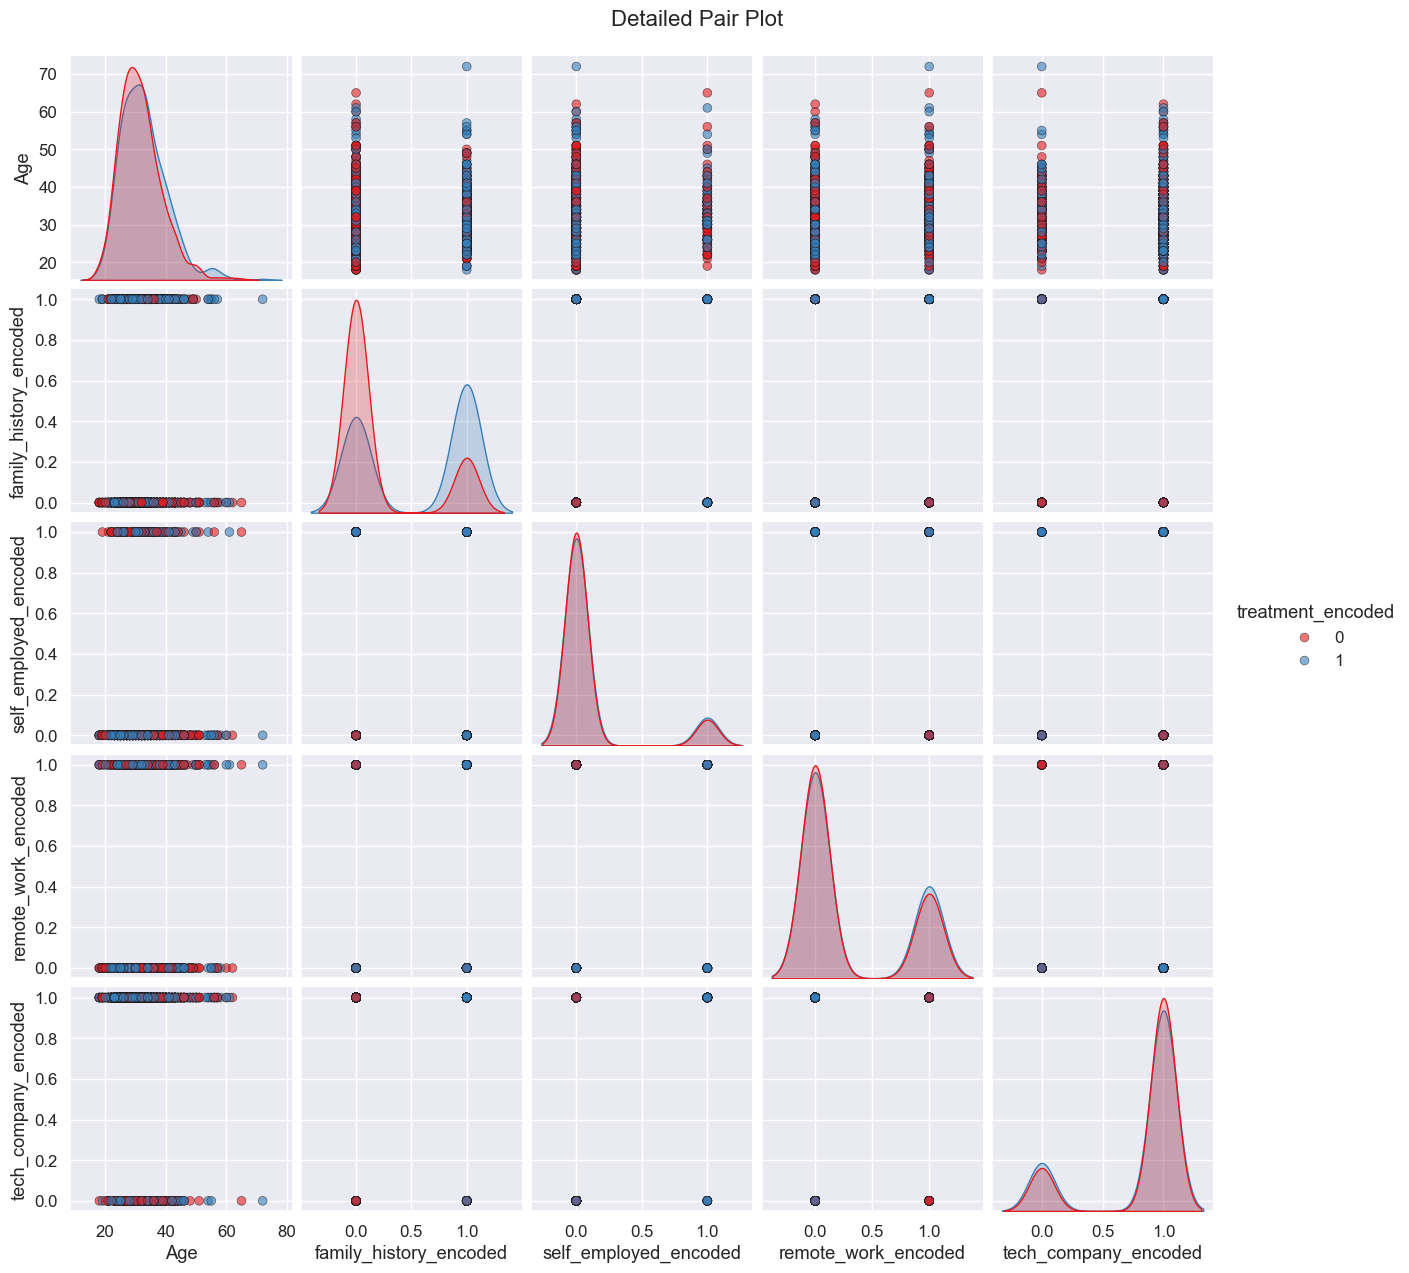

In [60]:
sns.pairplot(df[pairplot_features], 
             hue='treatment_encoded',      
             palette='Set1',               
             diag_kind='kde',             
             plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'}) 
plt.suptitle('Detailed Pair Plot', y=1.02, fontsize=16)
plt.show()

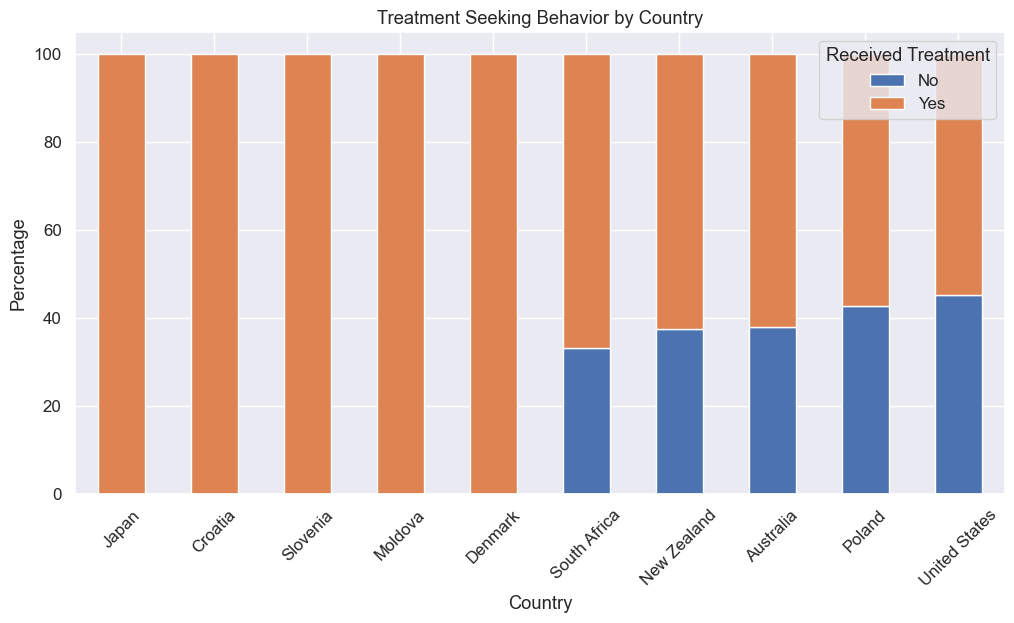

In [62]:
# Treatment by country 
treatment_by_country = df.groupby('Country')['treatment'].value_counts(normalize=True).unstack().fillna(0) * 100
treatment_by_country.sort_values('Yes', ascending=False).head(10).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Treatment Seeking Behavior by Country')
plt.ylabel('Percentage')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Received Treatment')
plt.show()


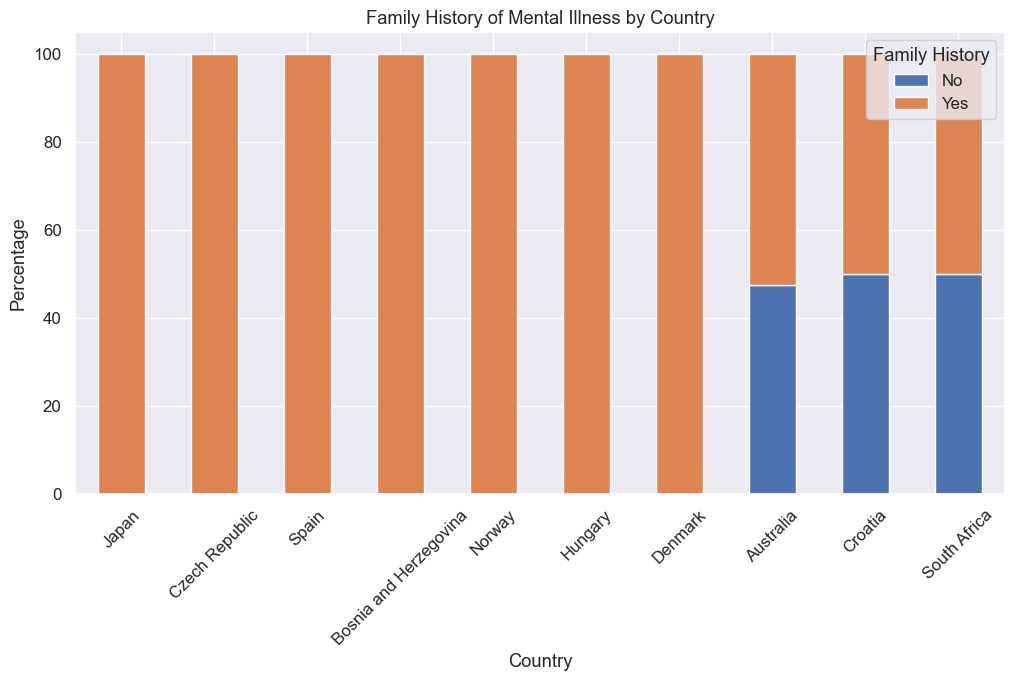

In [64]:
# Family Histort by Country
family_history_by_country = df.groupby('Country')['family_history'].value_counts(normalize=True).unstack().fillna(0) * 100
family_history_by_country.sort_values('Yes', ascending=False).head(10).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Family History of Mental Illness by Country')
plt.ylabel('Percentage')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Family History')
plt.show()


In [66]:
df['treatment_encoded'] = df['treatment'].map({'Yes': 1, 'No': 0})


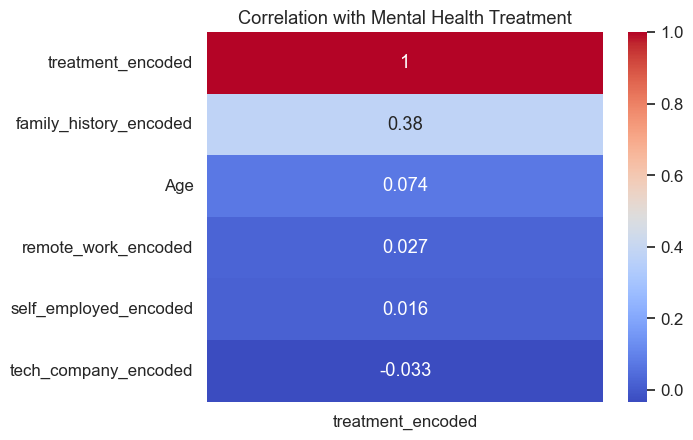

In [68]:
predictors = ['Age', 'family_history_encoded', 'self_employed_encoded',
              'remote_work_encoded', 'tech_company_encoded']

df_corr = df[predictors + ['treatment_encoded']].corr()

sns.heatmap(df_corr[['treatment_encoded']].sort_values(by='treatment_encoded', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Correlation with Mental Health Treatment')
plt.show()


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df[predictors]
y = df['treatment_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print("Feature Coefficients:", dict(zip(predictors, model.coef_[0])))
print("Accuracy:", model.score(X_test, y_test))
print("Report:\n", classification_report(y_test, model.predict(X_test)))


Feature Coefficients: {'Age': 0.03095336787025609, 'family_history_encoded': 1.5915409839942225, 'self_employed_encoded': -0.0582713620202809, 'remote_work_encoded': -0.1541242772352186, 'tech_company_encoded': 0.05509586196705904}
Accuracy: 0.6888297872340425
Report:
               precision    recall  f1-score   support

           0       0.64      0.78      0.70       176
           1       0.76      0.61      0.68       200

    accuracy                           0.69       376
   macro avg       0.70      0.69      0.69       376
weighted avg       0.70      0.69      0.69       376

